In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
time = np.linspace(0,10,500)
norm_dist = np.random.normal(0,5,500)

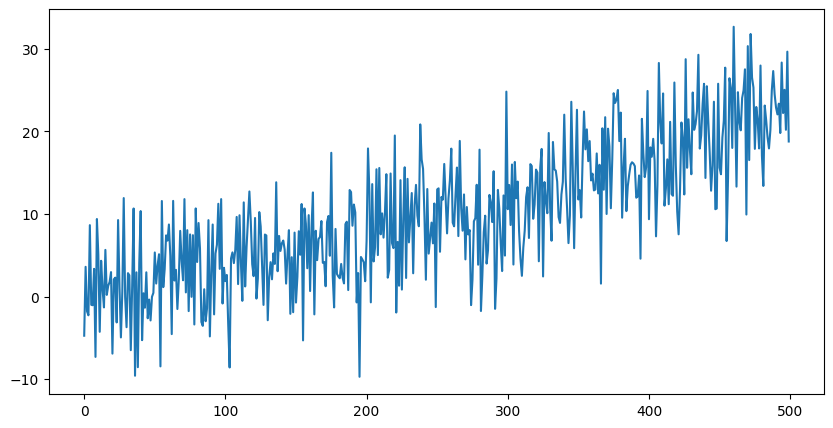

In [15]:
data = np.exp(time**0.5)
y = norm_dist + data

plt.figure(figsize=(10,5))
plt.plot(y)


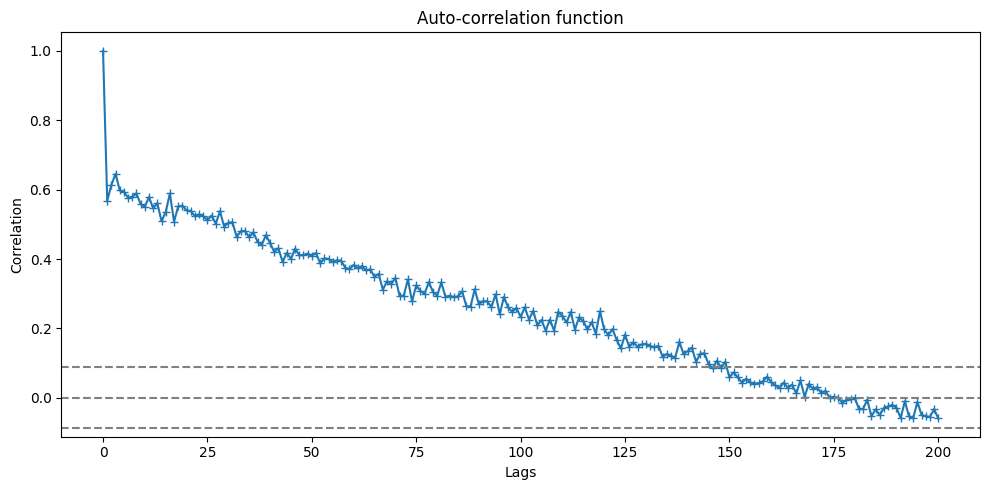

In [21]:
from statsmodels.tsa.stattools import acf, pacf, adfuller

# auto-correlation 
acf_lag = acf(y,nlags=200)

# plot ACF

plt.figure(figsize=(10,5))
plt.plot(acf_lag,marker="+")
plt.axhline(y=0,linestyle="--",color="gray")

plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle="--",color="gray")

plt.title("Auto-correlation function")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

## causes multicollinearity problem, so we go with PACF

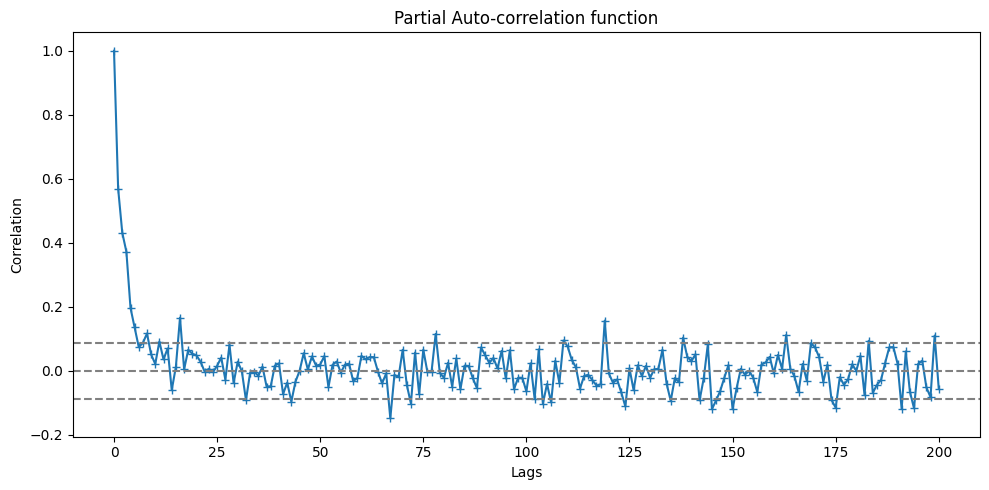

In [22]:

# partial auto-correlation 
pacf_lag = pacf(y,nlags=200)

# plot PACF

plt.figure(figsize=(10,5))
plt.plot(pacf_lag,marker="+")
plt.axhline(y=0,linestyle="--",color="gray")

plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle="--",color="gray")

plt.title("Partial Auto-correlation function")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

### the graph after lag = 6 crosses the upper confidence line, so we can build a AR model with lag = 6  

In [23]:
adf = adfuller(y,autolag="AIC")
print("p-value of ADF test: ",adf[1])

p-value of ADF test:  0.9155791160619572


p value greater thab 0.05, accept null hypothesis, that is the data is non- stationary

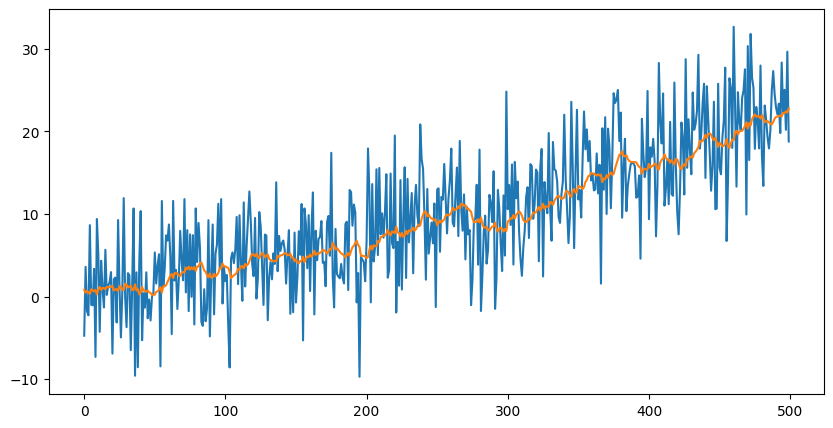

In [26]:
# smoothing the data
from statsmodels.tsa.api import ExponentialSmoothing, Holt
model = ExponentialSmoothing(y)
model_fit = model.fit()
y_smooth = model_fit.fittedvalues
plt.figure(figsize=(10,5))
plt.plot(y)
plt.plot(y_smooth)
plt.show()

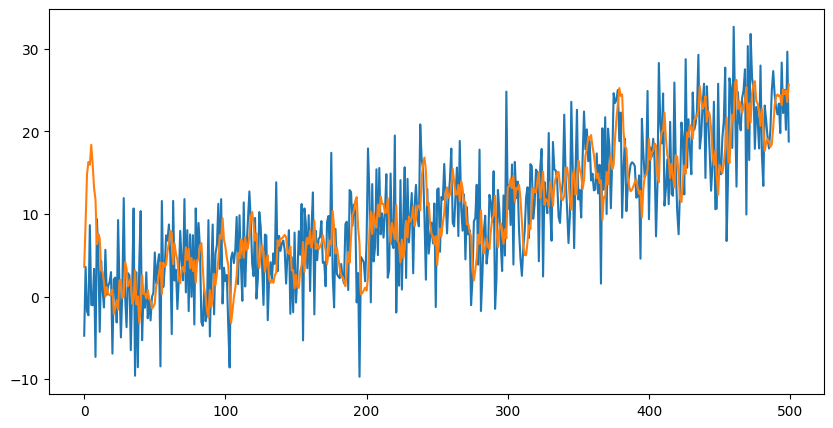

In [27]:
# with holt
model = Holt(y)
model_fit = model.fit()
y_smooth = model_fit.fittedvalues
plt.figure(figsize=(10,5))
plt.plot(y)
plt.plot(y_smooth)
plt.show()



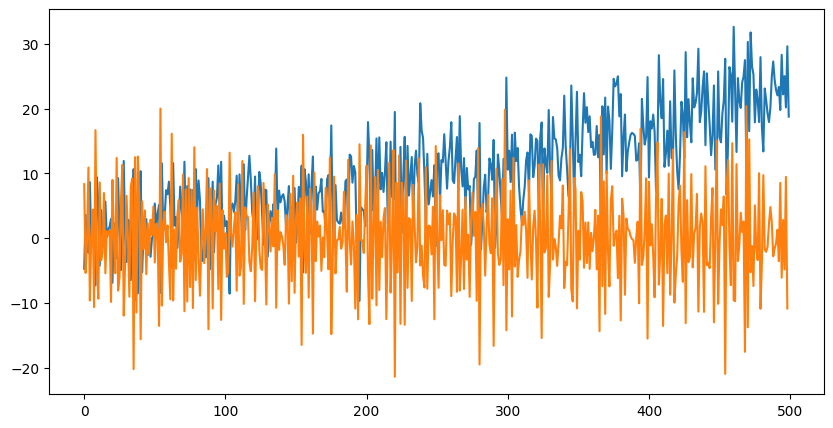

In [29]:
# differencing
y_diff = np.diff(y)
plt.figure(figsize=(10,5))
plt.plot(y)
plt.plot(y_diff)
plt.show()

In [30]:
# AR
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(y_diff,lags=6).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  499
Model:                     AutoReg(6)   Log Likelihood               -1535.245
Method:               Conditional MLE   S.D. of innovations              5.447
Date:                Fri, 24 May 2024   AIC                           3086.490
Time:                        15:48:14   BIC                           3120.094
Sample:                             6   HQIC                          3099.684
                                  499                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1813      0.246      0.738      0.461      -0.300       0.663
y.L1          -0.9703      0.045    -21.669      0.000      -1.058      -0.883
y.L2          -0.7933      0.062    -12.833      0.000      -0.914      -0.672
y.L3          -0.5198      0.070     -7.473      0.000      -0.656      -0.383
y.L4          -0.3515      0.070     -5.051      0.000      -0.488      -0.215
y.L5          -0.2136      0.062     -3.461      0.001      -0.335      -0.093
y.L6          -0.1138      0.045     -2.543      0.011      -0.201      -0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7766           -1.2506j            1.4721           -0.1616
AR.2            0.7766           +1.2506j            1.4721            0.1616
AR.3           -1.2819           -0.6407j            1.4331           -0.4262
AR.4           -1.2819           +0.6407j            1.4331            0.4262
AR.5           -0.4331           -1.3367j            1.4051           -0.2999
AR.6           -0.4331           +1.3367j            1.4051            0.2999
-----------------------------------------------------------------------------
"""

In [31]:
# AR
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(y,lags=6).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                     AutoReg(6)   Log Likelihood               -1538.425
Method:               Conditional MLE   S.D. of innovations              5.448
Date:                Fri, 24 May 2024   AIC                           3092.851
Time:                        15:56:43   BIC                           3126.471
Sample:                             6   HQIC                          3106.050
                                  500                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0112      0.440      2.298      0.022       0.149       1.874
y.L1           0.0298      0.045      0.665      0.506      -0.058       0.118
y.L2           0.1800      0.044      4.059      0.000       0.093       0.267
y.L3           0.2817      0.044      6.352      0.000       0.195       0.369
y.L4           0.1879      0.044      4.242      0.000       0.101       0.275
y.L5           0.1440      0.044      3.242      0.001       0.057       0.231
y.L6           0.0913      0.045      2.034      0.042       0.003       0.179
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0252           -0.0000j            1.0252           -0.0000
AR.2            0.4749           -1.5193j            1.5918           -0.2018
AR.3            0.4749           +1.5193j            1.5918            0.2018
AR.4           -0.9025           -1.2641j            1.5532           -0.3487
AR.5           -0.9025           +1.2641j            1.5532            0.3487
AR.6           -1.7474           -0.0000j            1.7474           -0.5000
-----------------------------------------------------------------------------
"""